In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
N = 2 #Number of colonies
Adot = 1  #Time derivative of Area
T = 100  #Max time of evolution
L = 10  #Length of the square box
dr = [L/350,L/700]  #Rate of change in redius
a = 10  #Determines the number of directions that the colonies expand to
dmin = 0.3 #Distance that is considered too close to be able to grow further

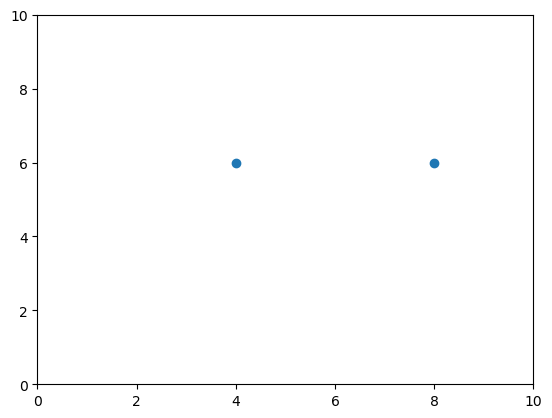

In [38]:
x0,y0 = np.zeros(N),np.zeros(N)


x0[0],y0[0] = 4,6
x0[1],y0[1] = 8,6

plt.ylim(0,L)
plt.xlim(0,L)
plt.scatter(x0,y0)

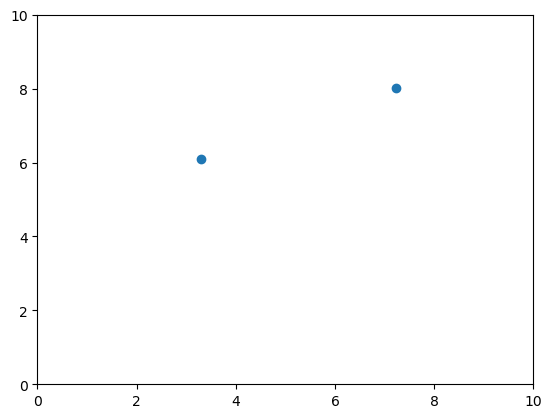

In [3]:
x0,y0 = np.zeros(N),np.zeros(N)


x0[0],y0[0] = np.random.uniform(L/10,9*L/10),np.random.uniform(L/10,9*L/10)
for i in range(1,N):
    #Choose the position of the next colony to be within L/N of the previous one with some normal randomness
    x0[i] = np.random.normal((x0[i-1]+L/N)%L, L/10)%L
    y0[i] = np.random.normal((y0[i-1]+L/N)%L, L/10)%L
    #Shift the positions towards middle so that we are faraway enough from the walls
    x0[i] += np.sign(L/2 - x0[i])*np.random.uniform(L/10, 2*L/10)
    y0[i] += np.sign(L/2 - y0[i])*np.random.uniform(L/10, 2*L/10)
    
    
plt.ylim(0,L)
plt.xlim(0,L)
plt.scatter(x0,y0)

In [40]:
def collision(x1,y1,x2,y2,i):  #(x1,y1) is a point and (x2,y2) are a set of points
    if np.sqrt((x1-6)**2+(y1-6)**2)>=5:
        return 0
    c = [n for n in range(N) if n!=i]  #For the clusters other than the one containing (x1,y1)
    for k in c:
        for j in range(len(x2[k])):
            if (x1 - x2[k][j])**2 + (y1 - y2[k][j])**2 < dmin*dmin:
                return 0
    return 1

In [42]:
x,y = [[x0[i]] for i in range(N)],[[y0[i]] for i in range(N)]

for t in range(1,50):  #Each time
    theta = 2*np.pi/(a*t)  #The angle between adjacent expand direction
    for i in range(N):  #Each colony
        # dmin = dr[i]*2
        for j in range(a*t):  #Each direction
            p = x[i][0] + t*dr[i]*np.cos(j*theta)
            q = y[i][0] + t*dr[i]*np.sin(j*theta)
            if collision(p,q,x,y,i) == 1:
                x[i] += [p]
                y[i] += [q]



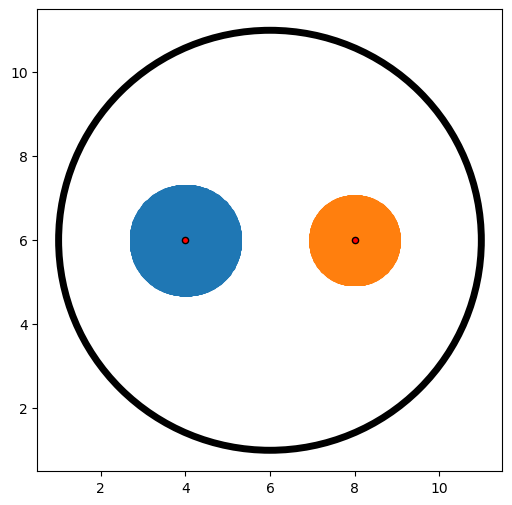

In [48]:
plt.figure(figsize=(6, 6))


for i in range(N):
    plt.scatter(x[i],y[i],s=30 )
    plt.scatter(x[i][0],y[i][0],s=20,c="r",edgecolors="black")
circle=plt.Circle((6,6),5, color='black', fill=False,linewidth=5)

ax = plt.gca()

ax.add_patch(circle)
# plt.savefig("N=4_25")
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initial setup
x = [[x0[i]] for i in range(N)]
y = [[y0[i]] for i in range(N)]

fig, ax = plt.subplots(figsize=(8, 8))  # Larger figure for better quality
scatters = [ax.scatter([], [], s=30) for _ in range(N)]
centers = [ax.scatter([], [], s=20, c='r', edgecolors='black') for _ in range(N)]

# Petri dish boundary
circle = plt.Circle((6, 6), 5, color='black', fill=False, linewidth=3)
ax.add_patch(circle)
margin = 1  # You can adjust this

# Remove axis ticks and labels
ax.set_xlim(6 - 5 - margin, 6 + 5 + margin)
ax.set_ylim(6 - 5 - margin, 6 + 5 + margin)
ax.axis('off')

# Time label
time_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                    ha='left', va='top', fontsize=14, fontweight='bold')

# Store grown coordinates over time
growth_data = [[[], []] for _ in range(N)]  # list of [x, y] for each colony

def update(t):
    if t == 0:
        time_text.set_text(f'Time step: {t}')
        return scatters + centers + [time_text]

    theta = 2 * np.pi / (a * t)

    for i in range(N):
        for j in range(a * t):
            p = x[i][0] + t * dr[i] * np.cos(j * theta)
            q = y[i][0] + t * dr[i] * np.sin(j * theta)
            if collision(p, q, x, y, i) == 1:
                x[i].append(p)
                y[i].append(q)

    # Update scatter plots
    for i in range(N):
        scatters[i].set_offsets(np.c_[x[i], y[i]])
        centers[i].set_offsets([[x[i][0], y[i][0]]])

    time_text.set_text(f'Time step: {t}')
    return scatters + centers + [time_text]

# Animate
ani = FuncAnimation(fig, update, frames=110, interval=200, blit=True)

# Save to video with higher resolution
ani.save('colony_growth_animated.mp4', fps=5, dpi=200)

plt.close()
